In [25]:
import xarray as xr
%pylab inline
from tqdm import tqdm_notebook
import cmocean.cm as cmo

plt.rcParams['figure.figsize'] = (18,9)
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

font = {'family' : 'Arial',
        'weight' : 'ultralight',
        'size'   : 13}

matplotlib.rc('font', **font)

rc('ytick.major', size=5)
rc('xtick.major', size=5)

rc('lines', linewidth=2.5)

import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
weeks = mdates.WeekdayLocator(byweekday=MO, interval=2)
week = mdates.WeekdayLocator(byweekday=MO, interval=1)
yearsFmt = mdates.DateFormatter("%d.%m")

Populating the interactive namespace from numpy and matplotlib


### Import glider data

In [22]:
dat_saz = xr.open_dataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/sg542_saz_L2.nc')
dat_apz = xr.open_dataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/slocum_apz_L2.nc')
dat_miz = xr.open_dataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/sg643_miz_L2.nc')

In [23]:
dat_saz_interp = dat_saz.resample(time='1D', loffset='12H').mean()
dat_apz_interp = dat_apz.resample(time='1D', loffset='12H').mean()
dat_miz_interp = dat_miz.resample(time='1D', loffset='12H').mean()

dat_saz_interp=dat_saz_interp.interpolate_na(dim='time')
dat_apz_interp=dat_apz_interp.interpolate_na(dim='time')
dat_miz_interp=dat_miz_interp.interpolate_na(dim='time')

#### Fig 3: Plot temperature and salinity sections of the glider data

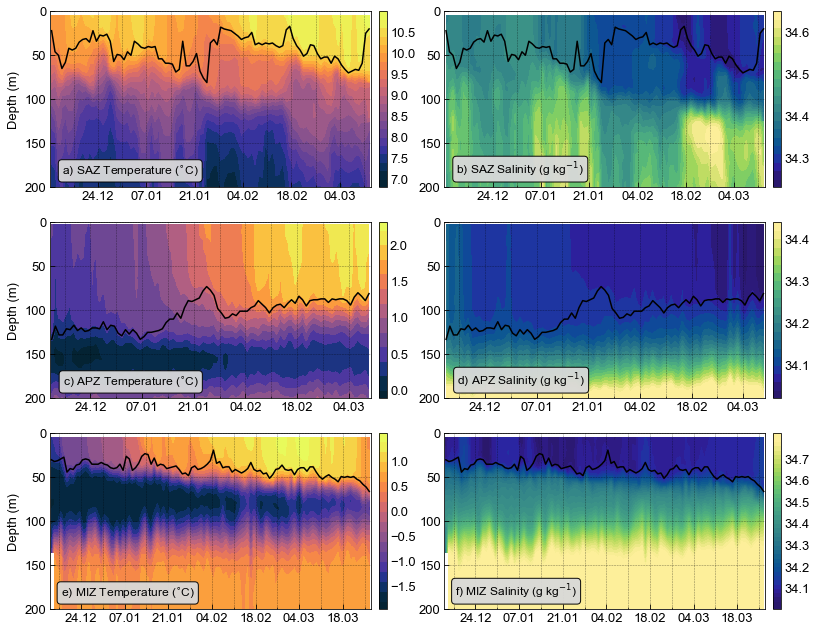

In [137]:
fig, ax = subplots(3, 2, figsize=[14, 11])
fig.subplots_adjust(hspace=0.2, wspace=0.02)

h00=ax[0, 0].contourf(dat_saz_interp.time.values, dat_saz_interp.depth, dat_saz_interp.temp.T, levels=np.arange(7, 10.8, 0.2), cmap=cmo.thermal, extend='both')
h10=ax[1, 0].contourf(dat_apz_interp.time.values, dat_apz_interp.depth, dat_apz_interp.temp.T, levels=np.arange(0, 2.3, 0.2), cmap=cmo.thermal, extend='both')
h20=ax[2, 0].contourf(dat_miz_interp.time.values, dat_miz_interp.depth, dat_miz_interp.temp.T, levels=np.arange(-1.8, 1.6, 0.2), cmap=cmo.thermal, extend='both')
h01=ax[0, 1].contourf(dat_saz_interp.time.values, dat_saz_interp.depth, dat_saz_interp.salt.T, levels=np.arange(34.25, 34.65, 0.02), cmap=cmo.haline, extend='both')
h11=ax[1, 1].contourf(dat_apz_interp.time.values, dat_apz_interp.depth, dat_apz_interp.salt.T, levels=np.arange(34.04, 34.42, 0.02), cmap=cmo.haline, extend='both')
h21=ax[2, 1].contourf(dat_miz_interp.time.values, dat_miz_interp.depth, dat_miz_interp.salt.T, levels=np.arange(34.04, 34.8, 0.02), cmap=cmo.haline, extend='both')

cb00 = colorbar(mappable=h00, ax=ax[0, 0], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(-2, 12.5, 0.5)); cb00.ax.tick_params(width=0)
cb10 = colorbar(mappable=h10, ax=ax[1, 0], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(-2, 12.5, 0.5)); cb10.ax.tick_params(width=0)
cb20 = colorbar(mappable=h20, ax=ax[2, 0], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(-2, 12.5, 0.5)); cb20.ax.tick_params(width=0)
cb01 = colorbar(mappable=h01, ax=ax[0, 1], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(34, 34.9, 0.1)); cb01.ax.tick_params(width=0)
cb11 = colorbar(mappable=h11, ax=ax[1, 1], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(34, 34.9, 0.1)); cb11.ax.tick_params(width=0)
cb21 = colorbar(mappable=h21, ax=ax[2, 1], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(34, 34.9, 0.1)); cb21.ax.tick_params(width=0)
        
#plot mixed layer depths

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    ax[i, 0].plot(dat.time, dat.mld_03, c='k', lw=1.5)
    ax[i, 1].plot(dat.time, dat.mld_03, c='k', lw=1.5)
    


[a[0].set_ylabel('Depth (m)', labelpad=5) for a in ax]

props = dict(boxstyle='round', facecolor='0.85', alpha=0.95)

# place a text box in upper left in axes coords
ax[0, 0].text(dat_saz_interp.time.values[3], 190, 'a) SAZ Temperature ($^{\circ}$C)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1, 0].text(dat_apz_interp.time.values[3], 190, 'c) APZ Temperature ($^{\circ}$C)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2, 0].text(dat_miz_interp.time.values[3], 190, 'e) MIZ Temperature ($^{\circ}$C)', fontsize=12, verticalalignment='bottom', bbox=props)

ax[0, 1].text(dat_saz_interp.time.values[3], 190, 'b) SAZ Salinity (g kg$^{-1}$)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[1, 1].text(dat_apz_interp.time.values[3], 190, 'd) APZ Salinity (g kg$^{-1}$)', fontsize=12, verticalalignment='bottom', bbox=props)
ax[2, 1].text(dat_miz_interp.time.values[3], 190, 'f) MIZ Salinity (g kg$^{-1}$)', fontsize=12, verticalalignment='bottom', bbox=props)

for i in range(2):
    ax[0, i].set_xlim('2018-12-10', '2019-03-13')
    ax[1, i].set_xlim('2018-12-13', '2019-03-10')
    ax[2, i].set_xlim('2018-12-14', '2019-03-27')

for a in ax:
    for i in range(2):
        a[i].set_ylim(200, 0)
        a[i].grid(lw=0.5, c='k', ls='--', alpha=0.5, which='both')
        a[i].xaxis.set_major_locator(weeks)
        a[i].xaxis.set_minor_locator(week)
        a[i].xaxis.set_major_formatter(yearsFmt)
        


savefig('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/figures/fig5_glider_sections.png', dpi=300, bbox_inches='tight')

In [57]:
for dat in [dat_saz_interp, dat_apz_interp, dat_miz_interp]:
    
    dat['buoyancy'] = -9.81*(dat['density']-1025)/1025
    dat['N2'] = -dat['buoyancy'].diff(dim='depth')

In [58]:
dat.N2.T.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [132]:
import my_functions as my

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    dat['mld_03'] = (('time'), my.calc_mld(dat.density, dat.depth, den_lim=0.03))

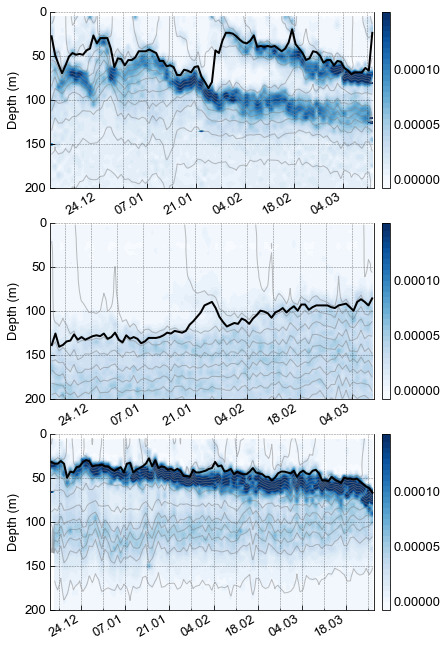

In [138]:
fig, ax = subplots(3, 1, figsize=[7, 11])

for i, dat in enumerate([dat_saz_interp, dat_apz_interp, dat_miz_interp]):
    
    im=dat.N2.T.plot.contourf(ax=ax[i], levels=np.arange(0, 1.5e-4, 0.5e-5), extend='both', add_colorbar=False, cmap='Blues')
    cb=colorbar(mappable=im, ax=ax[i], pad=0.02, extendrect=True, drawedges=False, ticks=np.arange(0, 4e-4, 0.5e-4))
    cb.ax.tick_params(width=0)
    
    ax[i].grid(lw=0.5, c='k', ls='--', alpha=0.5, which='both')
    ax[i].xaxis.set_major_locator(weeks)
    ax[i].xaxis.set_minor_locator(week)
    ax[i].xaxis.set_major_formatter(yearsFmt)
    
    ax[i].plot(dat.time, dat.mld_05, c='k', lw=2)

    ax[i].spines['top'].set_visible(False)
    
    dat.density.T.plot.contour(ax=ax[i], levels=np.arange(1026, 1029, 0.05), colors='0.5', linewidths=1, alpha=0.5)
    
    ax[i].set_ylim(200, 0)
    ax[i].set_ylabel('Depth (m)', labelpad=5)
    ax[i].set_xlabel('', labelpad=5)
    
ax[0].set_xlim('2018-12-10', '2019-03-13')
ax[1].set_xlim('2018-12-13', '2019-03-10')
ax[2].set_xlim('2018-12-14', '2019-03-27')
    
savefig('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/figures/fig6_N2_glider_sections.png', dpi=300, bbox_inches='tight')

In [ ]:
def calc_N2(dat):
    
    for i, val in dat.time:
    dat['N2'] = 